In [70]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
epsilon = 1
data = pd.read_csv('../../data/billboard_impact.csv')
data['log_deposits'] = np.log(data.deposits+epsilon)
data.head()

,deposits,poa,jul,log_deposits
0,42,1,0,3.761200
1,0,1,0,0.000000
2,52,1,0,3.970292
3,119,1,0,4.787492
4,21,1,0,3.091042


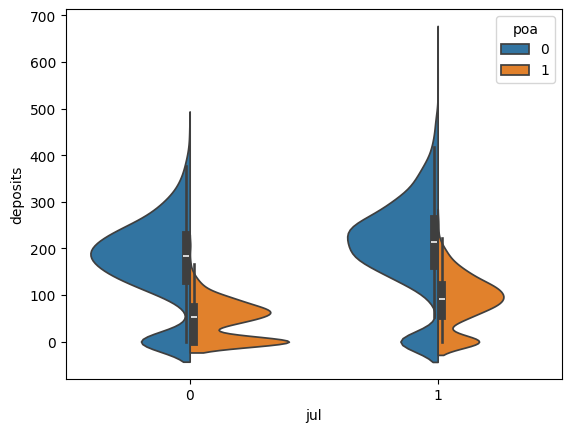

In [59]:
sns.violinplot(data=data, x='jul', y='deposits', hue='poa', split=True)
plt.show()

In [49]:
an = data.groupby(['poa', 'jul']).mean(numeric_only=True)

c0 = an.loc[0,0]
c1 = an.loc[0,1]
t0 = an.loc[1,0]
t1 = an.loc[1,1]

diff_in_diff = (t1 - t0) - (c1 - c0)
print('Effect of billboard:', diff_in_diff.iloc[0])

Effect of billboard: 6.524557692307688


In [33]:
model = smf.ols('deposits ~ poa*jul', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               deposits   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     696.7
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:29:41   Log-Likelihood:                -26973.
No. Observations:                4600   AIC:                         5.395e+04
Df Residuals:                    4596   BIC:                         5.398e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    171.6423      2.363     72.625      0.000     167.009     176.276
poa         -125.6263      4.484    -28.015      0.000    -134.418    -116.835
jul           34.5232      3.036     11.372      0.000      28.571      40.475
poa:jul        6.5246      5.729      1.139      0.255      -4.706      17.755
==============================================================================
Omnibus:                      184.879   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.379
Skew:                          -0.400   Prob(JB):                     1.29e-56
Kurtosis:                       3.838   Cond. No.                         7.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
print('Intercept:', data.query('poa == 0 and jul == 0').deposits.mean())
print('Poa:', data.query('poa == 1 and jul == 0').deposits.mean() - data.query('poa == 0 and jul == 0').deposits.mean())
print('Jul:', data.query('poa == 0 and jul == 1').deposits.mean() - data.query('poa == 0 and jul == 0').deposits.mean())

Intercept: 171.6423076923077
Poa: -125.6263076923077
Jul: 34.52319230769231


In [76]:
model = smf.ols('log_deposits ~ poa*jul', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_deposits   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     206.5
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          1.20e-125
Time:                        23:45:48   Log-Likelihood:                -9242.9
No. Observations:                4600   AIC:                         1.849e+04
Df Residuals:                    4596   BIC:                         1.852e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5117      0.050     90.100      0.000       4.414       4.610
poa           -1.7788      0.095    -18.722      0.000      -1.965      -1.593
jul            0.2973      0.064      4.622      0.000       0.171       0.423
poa:jul        0.7492      0.121      6.173      0.000       0.511       0.987
==============================================================================
Omnibus:                     1422.702   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3208.058
Skew:                          -1.826   Prob(JB):                         0.00
Kurtosis:                       4.846   Cond. No.                         7.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""